![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

2. Plot all the categorical variables with the proper plot. What can you see?
3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [3]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
data.columns = list(map(lambda x: x.lower().replace(" ", "_"), data.columns))

In [5]:
numericals = pd.DataFrame()
numericals = data.select_dtypes(np.number)

In [6]:
def separate_cont_disc(df, df_cont, df_disc):
    for i in df:
        if len(df[i].unique().tolist()) > 500:
            df_cont[i] = df[i]
        else:
            df_disc[i] = df[i]
    pass

In [7]:
continuous_df = pd.DataFrame()
discrete_df = pd.DataFrame()

separate_cont_disc(numericals, continuous_df, discrete_df)

In [8]:
discrete_df.head()

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1


In [9]:
def plt_discrete(df):
    for i in df:
        sns.barplot(x = df[i].value_counts().index, y = df[i].value_counts())
        plt.show()
    pass

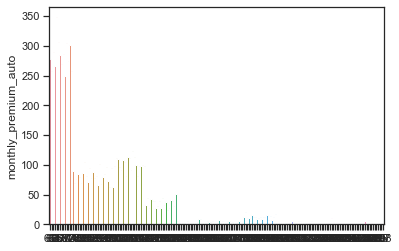

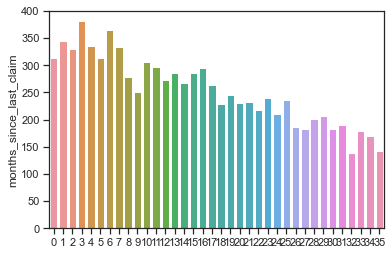

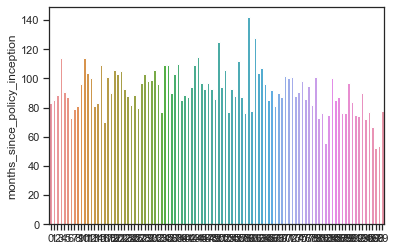

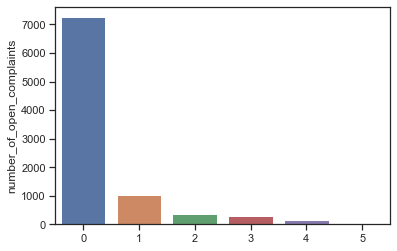

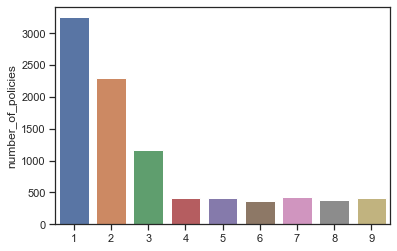

In [10]:
plt_discrete(discrete_df)

In [13]:
continuous = continuous_df
categorical = data.select_dtypes(np.object)

In [14]:
for i in discrete_df:
    categorical[i] = discrete_df[i]

In [15]:
categorical.head()

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,...,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,...,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,69,32,5,0,1
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,...,Personal L3,Offer3,Agent,Four-Door Car,Medsize,94,13,42,0,8
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,...,Personal L3,Offer1,Agent,Two-Door Car,Medsize,108,18,38,0,2
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,...,Corporate L2,Offer1,Call Center,SUV,Medsize,106,18,65,0,7
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,...,Personal L1,Offer1,Agent,Four-Door Car,Medsize,73,12,44,0,1


In [16]:
categorical['effective_to_date']=pd.to_datetime(categorical['effective_to_date'], errors='coerce')

In [17]:
categorical = categorical.drop('customer', axis=1)

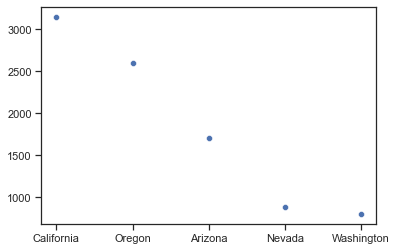

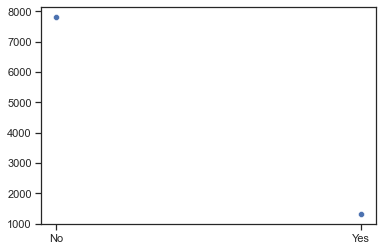

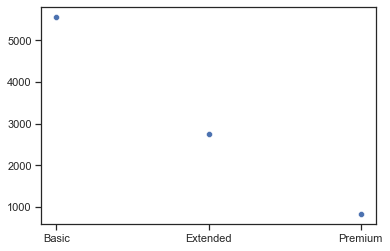

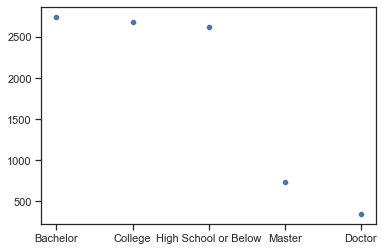

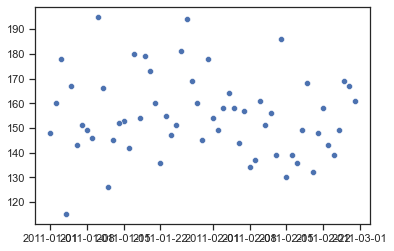

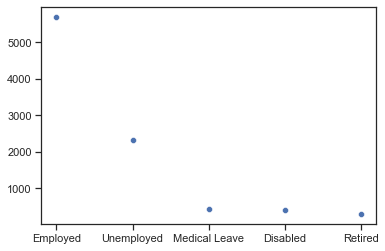

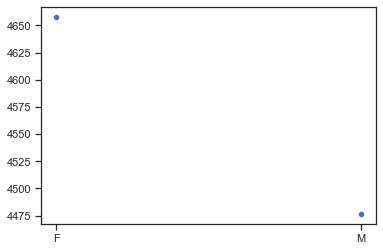

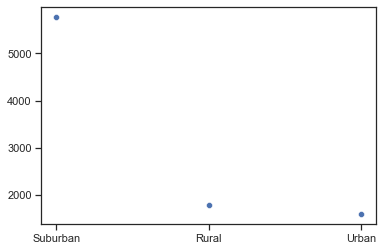

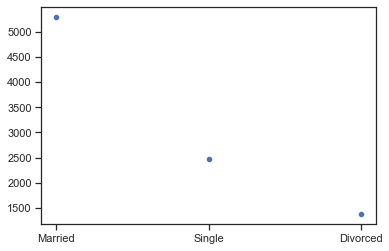

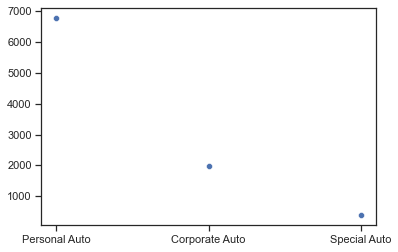

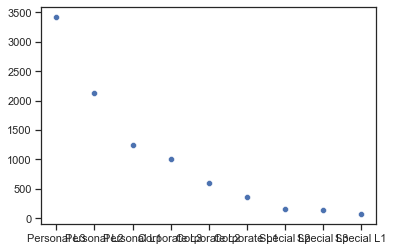

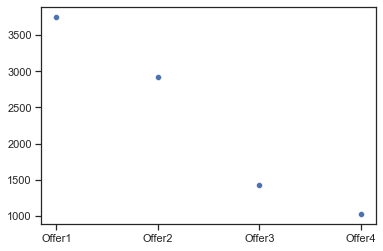

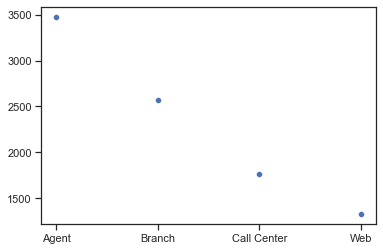

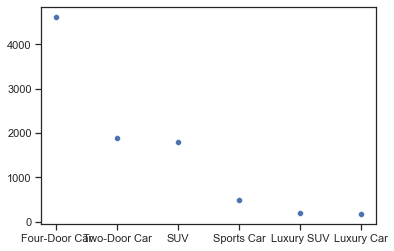

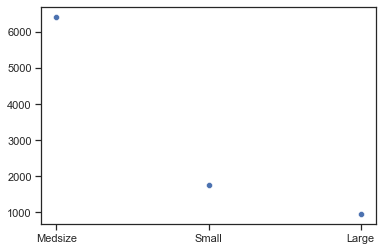

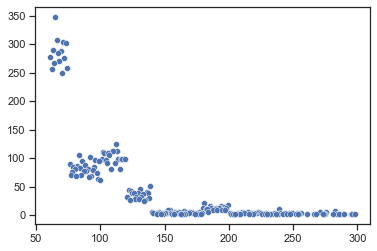

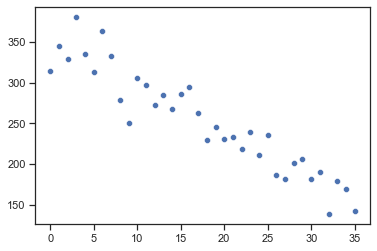

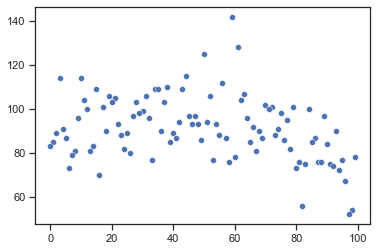

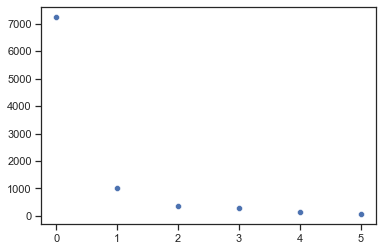

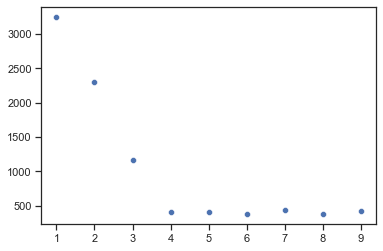

In [18]:
for i in categorical:
    sns.scatterplot(x=categorical[i].value_counts().index.tolist(), y=categorical[i].value_counts().values.tolist())
    plt.show()